In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'sigmoid'))

In [52]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [54]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 35ms/step - accuracy: 0.8565 - loss: 0.9535 - val_accuracy: 0.9822 - val_loss: 0.0632
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9795 - loss: 0.0690 - val_accuracy: 0.9817 - val_loss: 0.0679
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9845 - loss: 0.0523 - val_accuracy: 0.9795 - val_loss: 0.0722
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9850 - loss: 0.0449 - val_accuracy: 0.9862 - val_loss: 0.0529
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9870 - loss: 0.0358 - val_accuracy: 0.9855 - val_loss: 0.0533
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9862 - loss: 0.0302 - val_accuracy: 0.9880 - val_loss: 0.0514
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9897 - loss: 0.0251 - val_accuracy: 0.9823 - val_loss: 0.0417
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9826 -

In [58]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [68]:
y_pred1 = np.argmax(y_pred, axis = 1)

In [70]:
from sklearn.metrics import accuracy_score

test_score = y_test.flatten()
accuracy_score(y_test, y_pred1)

0.9774

Text(0.5, 1.0, 'Y_test : 7,y_pred : 7')

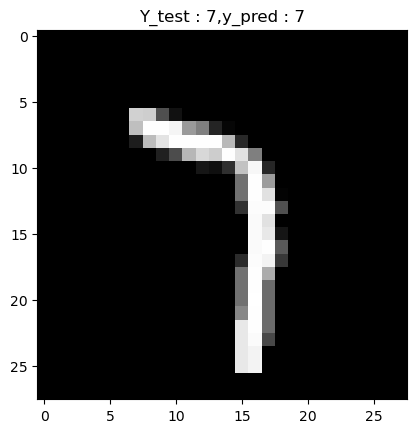

In [82]:
plt.imshow(x_test[122], cmap='gray')
plt.title(f"Y_test : {y_test[122]},y_pred : {y_pred1[122]}")

In [88]:
tf.keras.models.save_model(model,'number_prediction_model.hdf5')